## Đọc và kiểm tra dữ liệu
Trước tiên, chúng ta sẽ đọc dữ liệu từ file và kiểm tra cấu trúc của dataset để hiểu dữ liệu, bao gồm số cột, kiểu dữ liệu, và số lượng giá trị thiếu.

In [8]:
# 1. Import thư viện cần thiết
import pandas as pd

# 2. Đọc dữ liệu
file_path = "./gym_members_exercise_tracking.csv"
data = pd.read_csv(file_path)

# 3. Kiểm tra thông tin dữ liệu
print("Thông tin dữ liệu:")
print(data.info())  # Hiển thị thông tin cơ bản về các cột, kiểu dữ liệu, và giá trị thiếu

# Kiểm tra các giá trị thiếu trong từng cột
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(data.isnull().sum())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  

## Xử lý giá trị thiếu và mã hóa dữ liệu phân loại
Dữ liệu cần được làm sạch trước khi đưa vào mô hình. Ta sẽ:

1. Điền giá trị thiếu (nếu có) bằng trung bình đối với cột số.
2. Mã hóa các cột phân loại (ví dụ: Gender và Workout_Type) thành dạng số.

Xử lý giá trị thiếu cho cột số

In [9]:
# Xử lý giá trị thiếu cho cột số
numeric_columns = data.select_dtypes(include=["number"]).columns  # Lấy các cột số
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Kiểm tra xem còn giá trị thiếu không
print("\nSố lượng giá trị thiếu sau khi điền giá trị trung bình cho cột số:")
print(data.isnull().sum())

# Mã hóa các cột phân loại (dạng chuỗi) thành dạng số
data = pd.get_dummies(data, drop_first=True)

# Kiểm tra lại dữ liệu sau mã hóa
print("\nDữ liệu sau khi mã hóa:")
print(data.head())


Số lượng giá trị thiếu sau khi điền giá trị trung bình cho cột số:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Dữ liệu sau khi mã hóa:
   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      18

In [10]:
# 4. Điền giá trị thiếu cho các cột số
data.fillna(data.mean(), inplace=True)

# 5. Mã hóa các cột phân loại
# Chuyển các cột như 'Gender', 'Workout_Type' thành dạng số (dùng One-Hot Encoding)
data = pd.get_dummies(data, drop_first=True)

# Kiểm tra lại dữ liệu sau khi xử lý
print("\nDữ liệu sau khi xử lý giá trị thiếu và mã hóa:")
print(data.head())



Dữ liệu sau khi xử lý giá trị thiếu và mã hóa:
   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1               

## Tách dữ liệu thành X và y
Xác định X (các đặc trưng đầu vào) và y (mục tiêu cần dự đoán). Ở đây, giả sử bạn dự đoán Experience_Level.

In [11]:
# 6. Tách dữ liệu đầu vào X và đầu ra y
X = data.drop(columns=["Experience_Level"])  # Đổi tên cột nếu mục tiêu khác
y = data["Experience_Level"]

# Kiểm tra lại X và y
print("\nDữ liệu X (đặc trưng):")
print(X.head())
print("\nDữ liệu y (mục tiêu):")
print(y.head())



Dữ liệu X (đặc trưng):
   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)    BMI  Gender_Male  \
0                    3.5                              4  30.20         True   
1                    2.1            

## Chia tập dữ liệu và chuẩn hóa
Chia dữ liệu thành tập huấn luyện và kiểm tra, sau đó chuẩn hóa giá trị (Standardization) để SVM hoạt động hiệu quả.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 7. Chia tập dữ liệu thành huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Chuẩn hóa dữ liệu (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nDữ liệu sau khi chuẩn hóa:")
print(X_train[:5])  # Xem trước 5 hàng đầu tiên sau chuẩn hóa



Dữ liệu sau khi chuẩn hóa:
[[-1.53304512 -0.88120507 -0.97008833 -0.68108593  1.70030809  0.64940678
  -0.40374901  0.48828894 -0.16547852  0.93198659  0.7420429  -0.4972275
   0.93767108 -0.54665472 -0.6100279   1.82930826]
 [ 0.03035419 -0.61565746 -0.5824516  -1.54719389  1.63084945  0.1077413
  -0.99771086 -0.50711149  0.4109795  -1.56371867 -0.37030657 -0.37838126
  -1.06647205  1.82930826 -0.6100279  -0.54665472]
 [ 1.2646168   0.09563078 -0.03976017  1.22435159  0.72788721 -0.29850781
  -0.8492204  -0.86500827  0.21882682 -1.23095797 -0.37030657  0.1229061
  -1.06647205 -0.54665472 -0.6100279  -0.54665472]
 [-1.20390843 -0.69627013 -1.66783446  0.61807602  0.93626311  0.78482315
  -0.64133375 -0.3281631   1.06750113 -0.23267586 -1.48265605  0.16556885
  -1.06647205 -0.54665472 -0.6100279  -0.54665472]
 [-1.53304512 -0.38804522 -1.59030711  0.44485442 -1.14749592 -1.65267151
  -0.67103184 -0.93211392  0.47503039 -0.73181692  0.7420429   0.54343896
  -1.06647205 -0.54665472 -0.61

## Huấn luyện và đánh giá mô hình SVM
Sử dụng thuật toán SVM để huấn luyện và đánh giá.

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 9. Huấn luyện mô hình SVM
svm_model = SVC(kernel="linear", random_state=42)  # Dùng kernel 'linear' hoặc đổi thành 'rbf' nếu cần
svm_model.fit(X_train, y_train)

print("\nHuấn luyện mô hình SVM thành công!")

# 10. Dự đoán trên tập kiểm tra
y_pred = svm_model.predict(X_test)

# 11. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác của mô hình: {accuracy}")
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))



Huấn luyện mô hình SVM thành công!

Độ chính xác của mô hình: 0.8871794871794871

Báo cáo phân loại:
              precision    recall  f1-score   support

           1       0.88      0.83      0.86        78
           2       0.84      0.88      0.86        75
           3       1.00      1.00      1.00        42

    accuracy                           0.89       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.89      0.89      0.89       195



<Figure size 800x600 with 0 Axes>

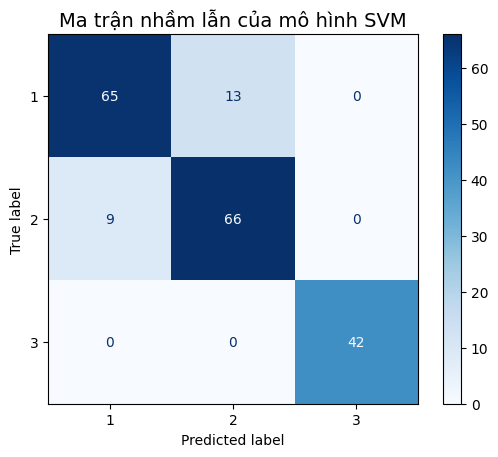

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tạo ma trận nhầm lẫn
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Ma trận nhầm lẫn của mô hình SVM', fontsize=14)
plt.show()

